In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Ellipse
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi
import pathlib as plb

In [23]:
h = pd.read_csv('/Users/Emily/Desktop/DS/EstimationGPCR.csv', index_col=0)
h.tail()

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
45,WT,frpr-16 del,2242,3030,mean difference,False,-5.404809,95,-6.238320,-4.547236,...,5000,12345,0.0,5000,9.700000e-37,12.759191,1.780000e-34,12.333495,1.980000e-24,3953930.0
46,WT,frpr-2(gk5296),2242,2080,mean difference,False,-6.095735,95,-6.980297,-5.206477,...,5000,12345,0.0,5000,1.240000e-42,13.841395,5.300000e-43,13.899701,2.120000e-40,2877089.5
47,WT,sre-48,2242,2472,mean difference,False,-6.679470,95,-7.505782,-5.874773,...,5000,12345,0.0,5000,1.430000e-60,16.657331,1.870000e-60,16.639201,2.050000e-64,3561915.0
48,WT,npr-8(ok1446),2242,2740,mean difference,False,-7.247297,95,-8.054485,-6.457334,...,5000,12345,0.0,5000,2.110000e-68,17.752722,5.080000e-67,17.559503,2.390000e-66,3940560.0
49,WT,sprr-1(ok3685),2242,1966,mean difference,False,-10.199684,95,-11.084633,-9.270246,...,5000,12345,0.0,5000,4.270000e-104,22.334540,2.250000e-106,22.547964,1.310000e-98,3032602.0


In [26]:

strains = h['test']
strains = strains.tolist()
print(len(strains))

50


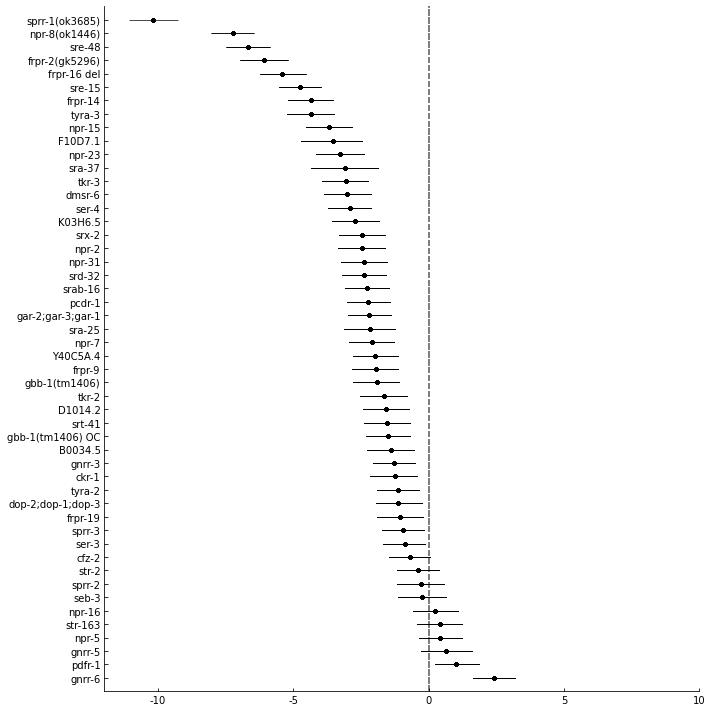

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 

positions = list(range(0, len(strains)))

lines = []

for index, row in h.iterrows():
    line = ((row['bca_low'], index), (row['bca_high'], index))
    lines.append(line)


    ytick_labels = strains

    mdiffs = list(h['difference'])

    hln_coll = mpl.collections.LineCollection(lines, colors='black', linewidths = .7)

    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    ax.axvline(0, ls='--', c='gray', zorder=1)
    #ax.fill_betweenx(positions, sub['bca_low'], sub['bca_high'], alpha=.25, joinstyle='round')
    ax.add_collection(hln_coll)
    ax.scatter(mdiffs, positions, s=8, c='black')
    ax.tick_params(axis='both', tickdir='in')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(-12,10)    
    ax.set_ylim(-1, len(strains))


    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('C:/Users/Emily/Desktop/DS/LRCI.svg')

In [31]:
lines

[((1.643906, 0), (3.172587, 0)),
 ((0.250151, 1), (1.843126, 1)),
 ((-0.286776, 2), (1.601078, 2)),
 ((-0.341925, 3), (1.220457, 3)),
 ((-0.446928, 4), (1.219223, 4)),
 ((-0.582609, 5), (1.081903, 5)),
 ((-1.12501, 6), (0.626373, 6)),
 ((-1.184846, 7), (0.555945, 7)),
 ((-1.167213, 8), (0.376554, 8)),
 ((-1.45792, 9), (0.035809, 9)),
 ((-1.692874, 10), (-0.126473, 10)),
 ((-1.725791, 11), (-0.17025, 11)),
 ((-1.907406, 12), (-0.196562, 12)),
 ((-1.953242, 13), (-0.263626, 13)),
 ((-1.927961, 14), (-0.34818, 14)),
 ((-2.159779, 15), (-0.421861, 15)),
 ((-2.0549, 16), (-0.49667, 16)),
 ((-2.280197, 17), (-0.552546, 17)),
 ((-2.33368, 18), (-0.693051, 18)),
 ((-2.389884, 19), (-0.683356, 19)),
 ((-2.425408, 20), (-0.731802, 20)),
 ((-2.534045, 21), (-0.789455, 21)),
 ((-2.799501, 22), (-1.107269, 22)),
 ((-2.833059, 23), (-1.138748, 23)),
 ((-2.792886, 24), (-1.144388, 24)),
 ((-2.938253, 25), (-1.271009, 25)),
 ((-3.118603, 26), (-1.235606, 26)),
 ((-2.994773, 27), (-1.406892, 27)),
 ((-